In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy.optimize import minimize_scalar


ModuleNotFoundError: No module named 'numpy'

NOMOR 1

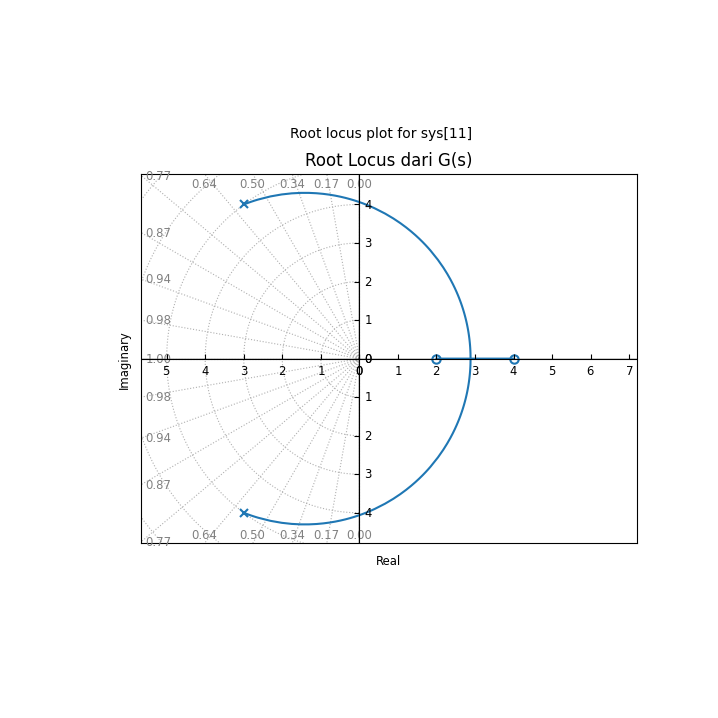

In [ ]:
#A
num = [1, -6, 8]
den = [1, 6, 25]
G = ct.TransferFunction(num, den)

ct.root_locus(G, grid=True)
plt.title("Root Locus sys_clari G(s)")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()

In [ ]:
#B
for K in [2, 4, 6, 8]:
    sys_cl = ct.feesys_clback(K * G, 1)
    poles = ct.poles(sys_cl)
    print(f"K = {K} -> Poles: {poles}")


K = 2 -> Poles: [1.+3.55902608j 1.-3.55902608j]
K = 4 -> Poles: [1.8+2.85657137j 1.8-2.85657137j]
K = 6 -> Poles: [2.14285714+2.4159335j 2.14285714-2.4159335j]
K = 8 -> Poles: [2.33333333+2.10818511j 2.33333333-2.10818511j]


In [ ]:
#C
for K in np.arange(0.1, 10, 0.1):
    sys_cl = ct.feedback(K * G, 1)
    poles = ct.poles(sys_cl)
    if np.all(np.real(poles) < 0):
        print(f"Sistem mulai stabil ketika K ≈ {K:.2f}")
        break


Sistem mulai stabil pada K ≈ 0.10


K = 0.1079, Kutub = [-2.41582691+4.18433068j -2.41582691-4.18433068j], ζ = 0.5000, ωn = 4.8317


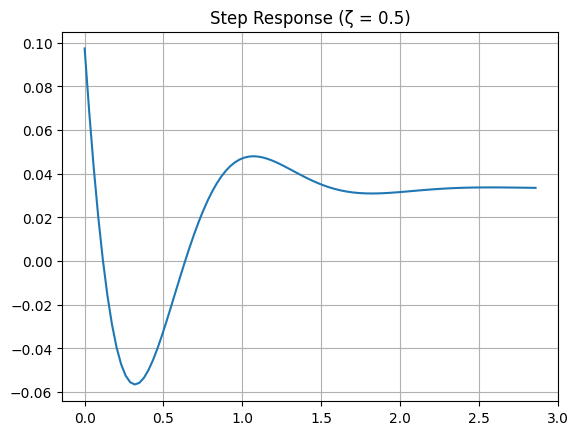

In [ ]:
#D
def damping_error(K):
    sys_cl = ct.feedback(K * G, 1)
    poles = ct.poles(sys_cl)
    dominant = poles[np.argmax(np.imag(poles))] if np.any(np.imag(poles)) else poles[0]
    wn = np.abs(dominant)
    zeta = -np.real(dominant) / wn
    return abs(zeta - 0.5)

res = minimize_scalar(damping_error, bounds=(0.1, 50), method='bounded')
K_opt_zeta = res.x
sys_cl_zeta = ct.feedback(K_opt_zeta * G, 1)
poles_zeta = ct.poles(sys_cl_zeta)
wn_zeta = np.abs(poles_zeta[0])
zeta = -np.real(poles_zeta[0]) / wn_zeta

print(f"K = {K_opt_zeta:.4f}, Kutub = {poles_zeta}, ζ = {zeta:.4f}, ωn = {wn_zeta:.4f}")
t, y = ct.step_response(sys_cl_zeta)
plt.plot(t, y)
plt.title("Step Response (ζ = 0.5)")
plt.grid(True)
plt.show()


K = 50.0000, Kutub = [2.88235292+0.15929532j 2.88235292-0.15929532j], ωn = 2.8868, ζ = -0.9985


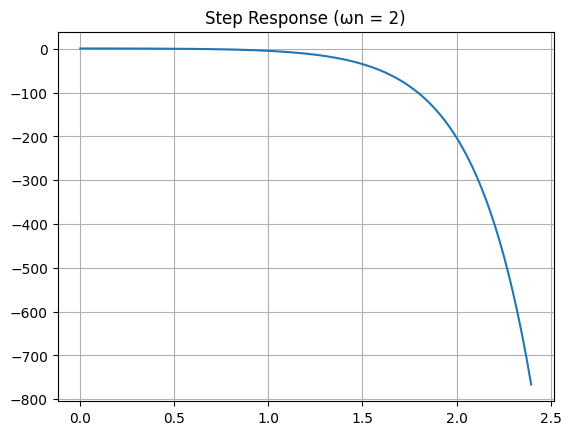

In [ ]:
#E
def wn_error(K):
    sys_cl = ct.feedback(K * G, 1)
    poles = ct.poles(sys_cl)
    dominan = poles[np.argmax(np.imag(poles))] if np.any(np.imag(poles)) else poles[0]
    wn = np.abs(dominan)
    return abs(wn - 2)

res_wn = minimize_scalar(wn_error, bounds=(0.1, 50), method='bounded')
K_opt_wn = res_wn.x
sys_cl_wn = ct.feedback(K_opt_wn * G, 1)
poles_wn = ct.poles(sys_cl_wn)
wn = np.abs(poles_wn[0])
zeta = -np.real(poles_wn[0]) / wn

print(f"K = {K_opt_wn:.4f}, Kutub = {poles_wn}, ωn = {wn:.4f}, ζ = {zeta:.4f}")
t, y = ct.step_response(sys_cl_wn)
plt.plot(t, y)
plt.title("Step Response (ωn = 2)")
plt.grid(True)
plt.show()


NOMOR 2

<StateSpace>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[   0.    1.    0.]
     [   0.    0.    1.]
     [-160.  -56.  -14.]]

B = [[0.]
     [0.]
     [1.]]

C = [[1. 0. 0.]]

D = [[0.]]

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-7.105e-15 s^2 - 7.105e-14 s + 1
--------------------------------
   s^3 + 14 s^2 + 56 s + 160



c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\signal\_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


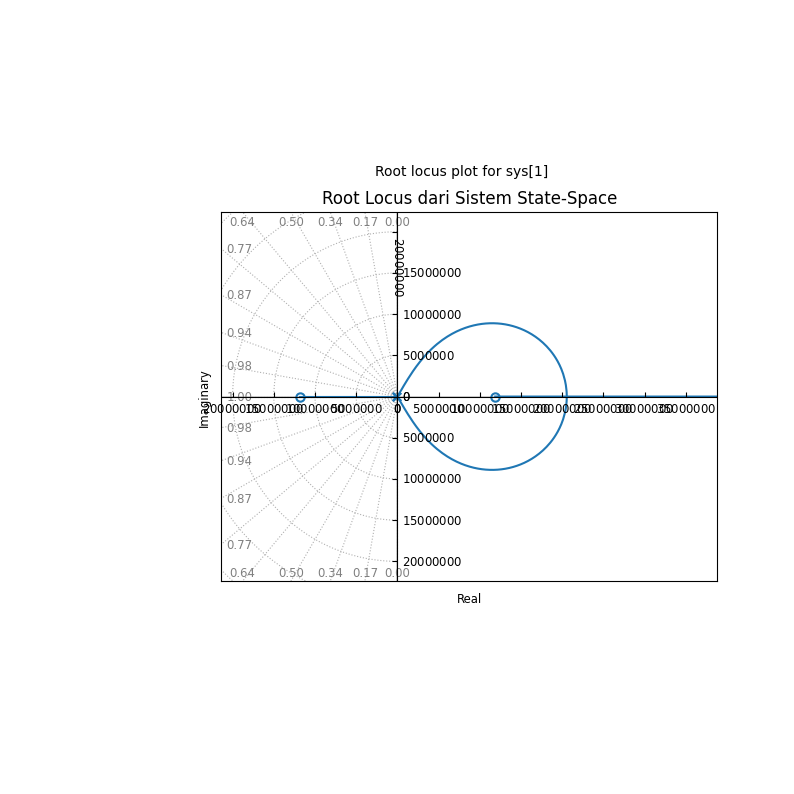

In [ ]:
A = np.array([[0, 1, 0], [0, 0, 1], [-160, -56, -14]])
B = np.array([[0], [0], [1]])
C = np.array([[1, 0, 0]])
D = np.array([[0]])

sys_ss = ct.ss(A, B, C, D)
sys_tf = ct.ss2tf(sys_ss)
print(sys_ss)
print(sys_tf)

ct.root_locus(sys_tf, grid=True)
plt.title("Root Locus dari Sistem State-Space")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()

In [ ]:
#B
for K in [10, 30, 50, 70]:
    sys_cl = ct.feedback(K * sys_tf, 1)
    poles = ct.poles(sys_cl)
    print(f"K = {K} → Kutub: {poles}")

K = 10 → Kutub: [-10.12809681+0.j          -1.9359516 +3.61068983j
  -1.9359516 -3.61068983j]
K = 30 → Kutub: [-10.36590553+0.j          -1.81704723+3.87655251j
  -1.81704723-3.87655251j]
K = 50 → Kutub: [-10.58358128+0.j          -1.70820936+4.11388814j
  -1.70820936-4.11388814j]
K = 70 → Kutub: [-10.7849676+0.j         -1.6075162+4.3291883j  -1.6075162-4.3291883j]


In [ ]:
#C
for K in np.arange(0.1, 100, 0.1):
    sys_cl = ct.feedback(K * sys_tf, 1)
    poles = ct.poles(sys_cl)
    print(poles)
    if np.all(np.real(poles) < 0):
        print(f"Sistem mulai stabil pada K ≈ {K:.2f}")
        break

[-10.00131543+0.j          -1.99934229+3.46562039j
  -1.99934229-3.46562039j]
Sistem mulai stabil pada K ≈ 0.10


K = 0.1000, 
Kutub = [ -1.99934226+3.46562046j  -1.99934226-3.46562046j
 -10.00131548+0.j        ], 
ζ = 0.4997, 
ωn = 4.0010


c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\signal\_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)
c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\signal\_lti_conversion.py:74: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  num, den = normalize(num, den)   # Strips zeros, checks arrays


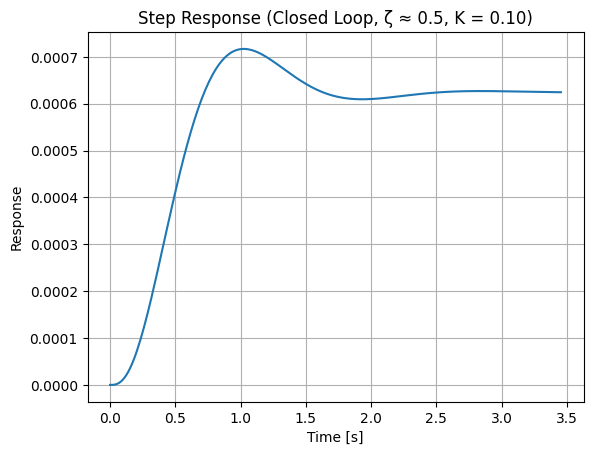

In [ ]:
#D
def damping_error(K):
    sys_cl = ct.feedback(K * sys_tf, 1)
    poles = ct.poles(sys_cl)
    dominan = poles[np.argmax(np.imag(poles))] if np.any(np.imag(poles)) else poles[0]
    wn = np.abs(dominan)
    zeta = -np.real(dominan) / wn
    return abs(zeta - 0.5)

from scipy.optimize import minimize_scalar
res = minimize_scalar(damping_error, bounds=(0.1, 100), method='bounded')
K_zeta = res.x

A_cl = A - K_zeta * B @ C
poles = np.linalg.eigvals(A_cl)
wn = np.abs(poles[0])
zeta = -np.real(poles[0]) / wn

print(f"K = {K_zeta:.4f}, \nKutub = {poles}, \nζ = {zeta:.4f}, \nωn = {wn:.4f}")
sys_cl = ct.feedback(K_zeta * sys_tf, 1)

time, response = ct.step_response(sys_cl)
plt.figure()
plt.plot(time, response)
plt.title(f'Step Response (Closed Loop, ζ ≈ 0.5, K = {K_zeta:.2f})')
plt.xlabel('Time [s]')
plt.ylabel('Response')
plt.grid(True)
plt.show()

K = 100.0000, 
Kutub = [ -1.46880279+4.6201371j  -1.46880279-4.6201371j -11.06239442+0.j       ], 
ωn ≈ 10, 
ζ = 0.3030

K = 0.1000, 
Kutub = [ -1.99934226+3.46562046j  -1.99934226-3.46562046j
 -10.00131548+0.j        ], 
ζ = 0.4997, 
ωn = 4.0010


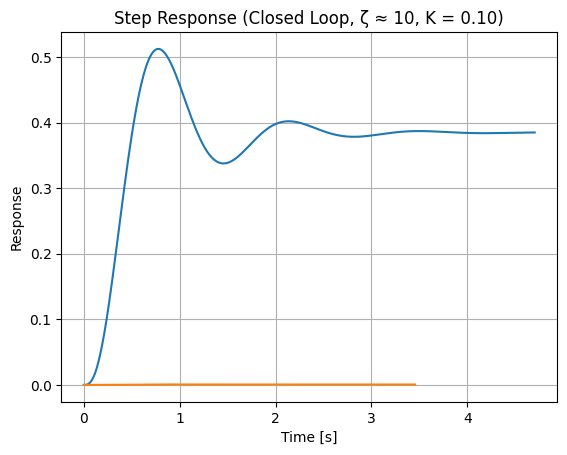

In [ ]:
#E
def wn_error(K):
    sys_cl = ct.feedback(K * sys_tf, 1)
    poles = ct.poles(sys_cl)
    dominan = poles[np.argmax(np.imag(poles))] if np.any(np.imag(poles)) else poles[0]
    wn = np.abs(dominan)
    return abs(wn - 10)

res_wn = minimize_scalar(wn_error, bounds=(0.1, 100), method='bounded')
K_wn = res_wn.x
A_cl_wn = A - K_wn * B @ C
poles = np.linalg.eigvals(A_cl_wn)
zeta = -np.real(poles[0]) / np.abs(poles[0])
print(f"K = {K_wn:.4f}, \nKutub = {poles}, \nωn ≈ 10, \nζ = {zeta:.4f}\n")

def overshoot_error(K):
    sys_cl = ct.feedback(K * sys_tf, 1)
    info = ct.step_info(sys_cl)
    return info['Overshoot']

res_os = minimize_scalar(overshoot_error, bounds=(0.1, 100), method='bounded')
K_os = res_os.x
A_cl_os = A - K_os * B @ C
poles = np.linalg.eigvals(A_cl_os)
wn = np.abs(poles[0])
zeta = -np.real(poles[0]) / wn

print(f"K = {K_os:.4f}, \nKutub = {poles}, \nζ = {zeta:.4f}, \nωn = {wn:.4f}")

sys_cl = ct.feedback(K_wn * sys_tf, 1)
sys_cl2 = ct.feedback(K_os * sys_tf, 1)

time, response = ct.step_response(sys_cl)
time2, response2 = ct.step_response(sys_cl2)
plt.figure()
plt.plot(time, response)
plt.plot(time2, response2)
plt.title(f'Step Response (Closed Loop, ζ ≈ 10, K = {K_zeta:.2f})')
plt.xlabel('Time [s]')
plt.ylabel('Response')
plt.grid(True)
plt.show()
